# Data Analysis 
- Exploration




## Read Data

In [146]:
import pandas as pd
import warnings
import mariadb
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [147]:
username = 'cip_user'
password = 'cip_pw'
database_name = 'CIP'

conn = mariadb.connect(
        user=username,
        password=password,
        host="localhost",
        port=3306,
        database=database_name
    )
mycursor = conn.cursor()

df = pd.read_sql_query("""SELECT 
                                resort,location_key,first_rental_day,return_date,gear_name,price,rental_duration,price_per_day,gear_class
                       
                                 FROM merged;""", conn)
df = pd.read_csv("../Data/merged.csv", sep=',')
conn.close()

## 1) How many Resorts with an Intersport in town?

In [148]:
filtered_df = df[df['rental_duration'].notnull()]
s=f"""Number of Resorts with an Intersport in town: {len(filtered_df['Resort'].unique())} """


In [149]:
from IPython.display import display, Markdown
Markdown('<br/><br/><br/><strong>{}</strong><br/><br/><br/>'.format( s))

<br/><br/><br/><strong>Number of Resorts with an Intersport in town: 44 </strong><br/><br/><br/>

## 2) How does the accommodation price differ based on location?  

For answering the question, we would use the comparable price column. Which is ratio of rate (i.e the price of the accomodation for a night including all additional expenses like cleaning, tax and offers) to persons (i.e the number of people that can share the accomodation at the same time). This is done to adjust so that bigger places are not considered expensive just because they are more spacious.

In [150]:
price_per_location = df.groupby('location').agg({'comparable price':'mean', 'surcharge':'mean' })#.sort_values(by='comparable price')

<Axes: >

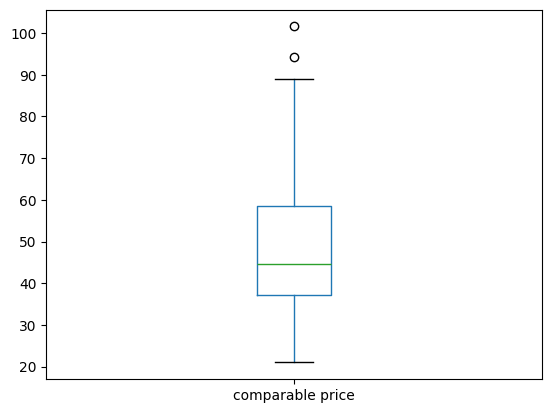

In [151]:
price_per_location.boxplot(column='comparable price',grid=False)

## 3) Highest/Lowest Combined price per night

### 3 Most Expensive Location (with INTERSPORT)

In [152]:
df_ski_premium = df[df['gear_name'] == 'Ski Premium']
df_ski_premium['adult - CHF'] = pd.to_numeric(df_ski_premium['adult - CHF'], errors='coerce')

df_ski_premium = df_ski_premium[["Resort","Location","comparable price","price_per_day","adult - CHF"]]
df_ski_premium['sum_prices'] =df_ski_premium['price_per_day'] + df_ski_premium['comparable price']

sum_prices_by_location = df_ski_premium.groupby('Location')['sum_prices'].mean()
sum_prices_by_location.sort_values(ascending=False).round(2).head(3)


Location
St. Moritz – Graubünden    145.83
Gstaad – Bern Region       139.53
Arosa – Graubünden         132.79
Name: sum_prices, dtype: float64

### 3 Most Expensive Location (NO Intersport in town )

In [153]:
df_null_gear = df[df['gear_name'].isnull()]
df_null_gear['adult - CHF'] = pd.to_numeric(df_null_gear['adult - CHF'], errors='coerce')
df_null_gear = df_null_gear[["Resort","Location","comparable price","price_per_day","adult - CHF"]]
df_null_gear['sum_prices'] = df_null_gear['comparable price']
sum_prices_by_location = df_null_gear.groupby('Location')['sum_prices'].mean().dropna()
sum_prices_by_location.sort_values(ascending=False).round(2).head(3)

Location
Zermatt – Valais                              103.07
Verbier – Valais                               97.23
Hoch-Ybrig – Lucerne - Lake Lucerne Region     92.00
Name: sum_prices, dtype: float64

### 3  Cheapest (with INTERSPORT)

In [154]:
sum_prices_by_location = df_ski_premium.groupby('Location')['sum_prices'].mean().dropna()
sum_prices_by_location.sort_values(ascending=False).round(2).tail(3)


Location
La Roche - La Berra – Region of Fribourg    58.76
Buttes La Robella – Jura & Three-Lakes      58.34
La Dôle – Canton of Vaud                    50.16
Name: sum_prices, dtype: float64

### 3 Cheapest (NO INTERSPORT in town)

In [155]:
sum_prices_by_location = df_null_gear.groupby('Location')['sum_prices'].mean().dropna()
sum_prices_by_location.sort_values(ascending=False).round(2).tail(3)

Location
Urnäsch – Eastern Switzerland / Liechtenstein    24.60
Carì – Ticino                                    20.56
Bivio – Graubünden                               13.50
Name: sum_prices, dtype: float64